In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import datetime as dt
import os
import joblib
import seaborn as sns
# customisations - ensure tables show all columns
pd.set_option("max_columns", 100)

In [2]:
df = joblib.load('data/review_eda')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76640 entries, 0 to 76639
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   app_id               76640 non-null  int64         
 1   dlc                  76640 non-null  int64         
 2   recommendationid     76640 non-null  object        
 3   review               76640 non-null  object        
 4   voted_up             76640 non-null  object        
 5   votes_up             76640 non-null  float64       
 6   votes_funny          76640 non-null  float64       
 7   weighted_vote_score  76640 non-null  float64       
 8   review_created       76640 non-null  datetime64[ns]
 9   review_updated       76640 non-null  datetime64[ns]
 10  review_year          76640 non-null  int64         
 11  steamid              76640 non-null  object        
 12  num_games_owned      76640 non-null  int64         
 13  num_reviews          76640 non-

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def getSentiment(df,review_col):
    
    """This function uses Vader to analyse sentiment of review.
    Positive, neutral, negative and compound scores are added to the DataFrame
    """ 

    #Instantiate instance of Vader sentiment model
    analyser = SentimentIntensityAnalyzer()

    #define columns and source columns
    sentiment_cols = [(('review_pos','review_neu','review_neg','review_com'),review_col)]

    #loop through columns
    for i in range(len(sentiment_cols)):

        #loop through pos,neu,neg,compound
        for col in range(len(sentiment_cols[i][:-1])):

            #get positive sentiment score
            df[sentiment_cols[i][col][0]] = df[sentiment_cols[i][-1]].map(lambda x: analyser.polarity_scores(x)['pos'])
        
            #get neutral sentiment score
            df[sentiment_cols[i][col][1]] = df[sentiment_cols[i][-1]].map(lambda x: analyser.polarity_scores(x)['neu'])
            
            #get negative sentiment score  
            df[sentiment_cols[i][col][2]] = df[sentiment_cols[i][-1]].map(lambda x: analyser.polarity_scores(x)['neg'])
            
            #get compound sentiment score
            df[sentiment_cols[i][col][3]] = df[sentiment_cols[i][-1]].map(lambda x: analyser.polarity_scores(x)['compound'])

    #return DataFrame
    return df

In [8]:
dfsent = getSentiment(df, 'review')

In [9]:
dfsent.head()

,app_id,dlc,recommendationid,review,voted_up,votes_up,votes_funny,weighted_vote_score,review_created,review_updated,review_year,steamid,num_games_owned,num_reviews,rating,helpful,review_length,review_pos,review_neu,review_neg,review_com
0,1256,1,23698284,"I got this back in 2010 and it was around $2, ...",False,51.0,1.0,0.781742,2016-06-22 03:34:47,2016-06-22 03:34:47,2016,76561197963558222,251,15,negative,helpful,175,0.181,0.819,0.000,0.8394
1,1256,1,13871472,DJ Scully nuff said.,True,23.0,4.0,0.707484,2015-01-06 22:47:16,2015-01-06 22:47:16,2015,76561198044217796,125,8,positive,helpful,20,0.000,1.000,0.000,0.0000
2,1256,1,2722792,These Killing Floor characters really adds to ...,True,22.0,2.0,0.659986,2011-12-09 03:54:38,2011-12-09 03:54:38,2011,76561198011647032,11679,502,positive,helpful,963,0.102,0.814,0.084,0.6956
3,1256,1,15154600,Guy in a HaZmat suit... cool\nSome guy with so...,True,7.0,10.0,0.593850,2015-04-01 13:25:40,2015-04-01 13:25:40,2015,76561198023430257,489,302,positive,helpful,176,0.309,0.617,0.074,0.8378
4,1256,1,640873,This DLC has the best looking character models...,True,9.0,0.0,0.591672,2010-12-15 01:26:52,2010-12-15 01:26:52,2010,76561197973951600,425,21,positive,helpful,62,0.296,0.704,0.000,0.6369


In [24]:
vad = SentimentIntensityAnalyzer()


# check sentiment analysis scores on an individual review
i = 36723
print(dfsent.review[i])
ss = vad.polarity_scores(dfsent.review[i])
for k in sorted(ss):
    print('{0}: {1}, '.format(k, ss[k]), end='')

the add on is good  but it took some time to load, this is a tip that i am giving to 

that on the captains mcpu it is supposed to say airbus 321-214 or whatever, if yours says something like A0-O and the engine says unknown, you have to restatrt your game

overall its good
compound: 0.9032, neg: 0.0, neu: 0.808, pos: 0.192, 

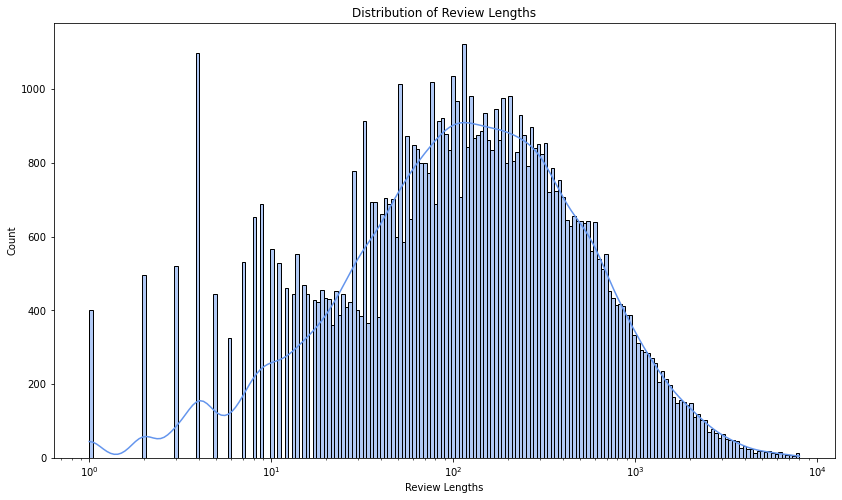

In [54]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(dfsent, x='review_length', ax=ax, bins=200, color='cornflowerblue', log_scale=True, kde=True)
ax.set_xlabel('Review Lengths')
ax.set_ylabel('Count')
ax.set_title('Distribution of Review Lengths')
plt.show()

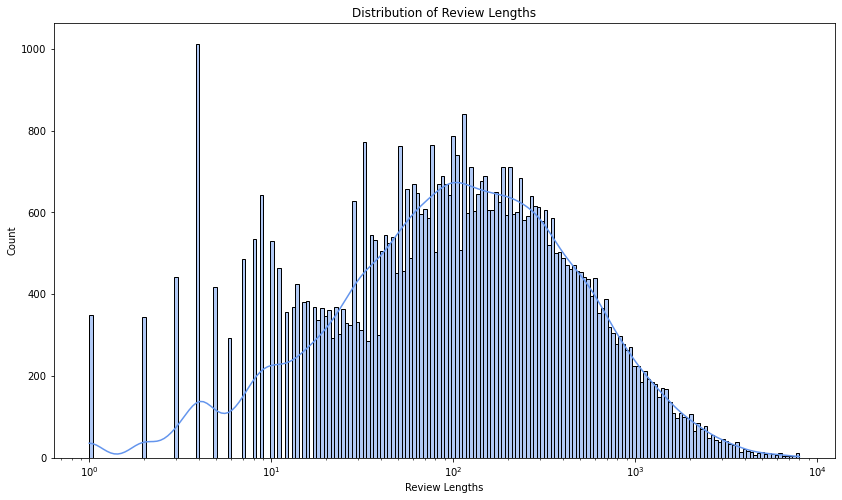

In [53]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(dfsent[dfsent.rating == 'positive'], x='review_length', ax=ax, bins=200, log_scale = True, 
             color='cornflowerblue', kde=True)
ax.set_xlabel('Review Lengths')
ax.set_ylabel('Count')
ax.set_title('Distribution of Review Lengths')
plt.show()

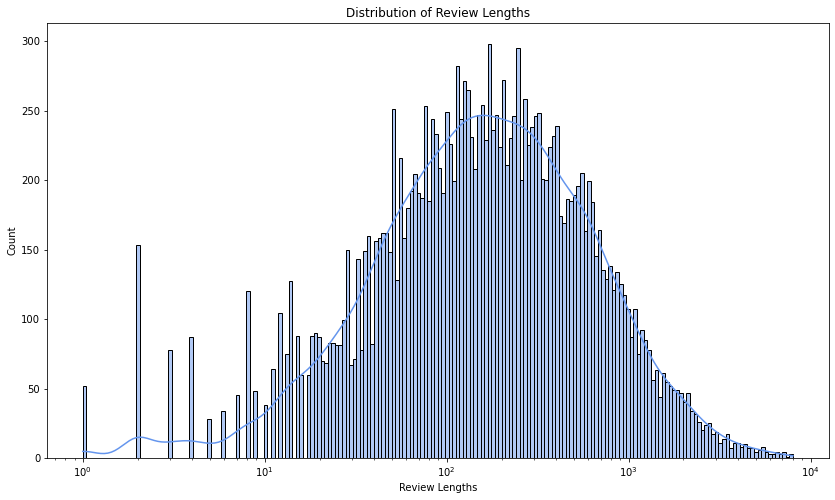

In [50]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(dfsent[dfsent.rating == 'negative'], x='review_length', ax=ax, bins=200, log_scale=True,
            color='cornflowerblue', kde=True)
ax.set_xlabel('Review Lengths')
ax.set_ylabel('Count')
ax.set_title('Distribution of Review Lengths')
plt.show()

<AxesSubplot:>

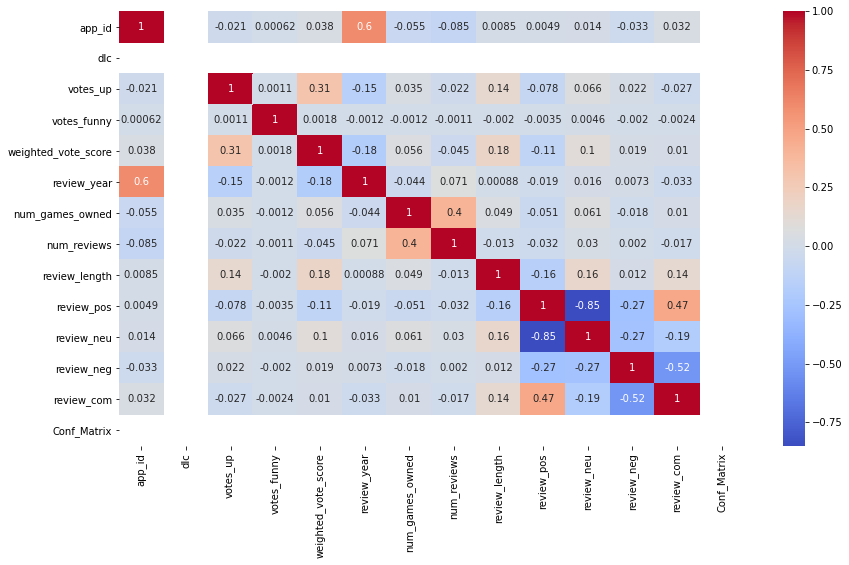

In [57]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(dfsent.corr(), cmap = 'coolwarm', annot = True)

In [ ]:
Avg review lenght around 80-300 ish
negative reviews tend to be longer

helpful rating slightly corerlated with review length

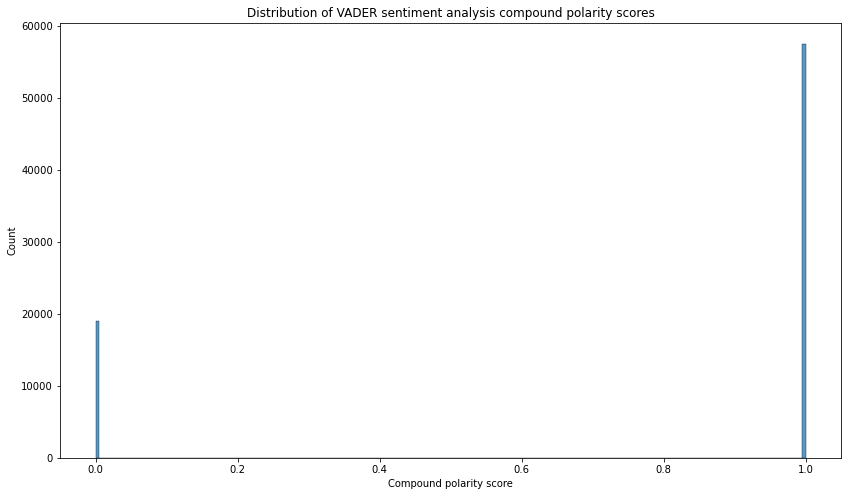

In [20]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(dfsent, x='voted_up', ax=ax, bins=200)
ax.set_xlabel('Review Score')
ax.set_ylabel('Count')
ax.set_title('Distribution of Review Score')
plt.show()

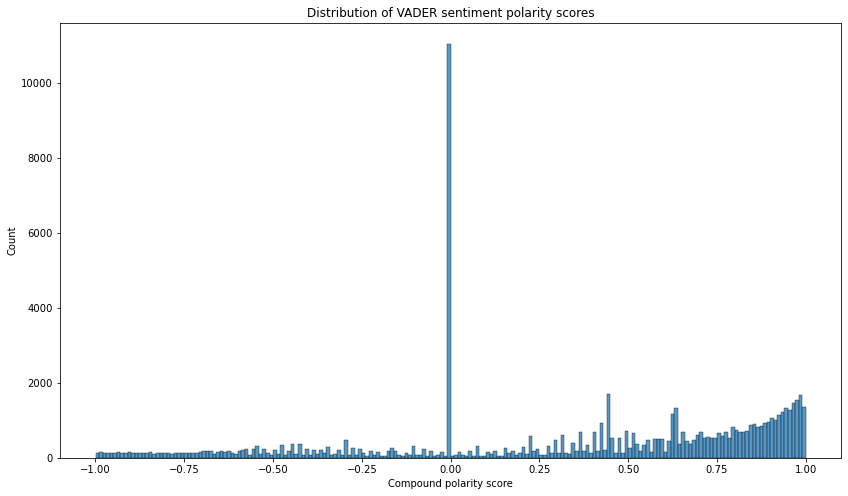

In [38]:
# plot compound polarity scores
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(dfsent, x='review_com', ax=ax, bins=200)
ax.set_xlabel('Compound polarity score')
ax.set_ylabel('Count')
ax.set_title('Distribution of VADER sentiment polarity scores')
plt.show()


In [ ]:
Vadar doesnt work well on my data

In [60]:
df.head()

,app_id,dlc,recommendationid,review,voted_up,votes_up,votes_funny,weighted_vote_score,review_created,review_updated,review_year,steamid,num_games_owned,num_reviews,rating,helpful,review_length,review_pos,review_neu,review_neg,review_com,Conf_Matrix
0,1256,1,23698284,"I got this back in 2010 and it was around $2, ...",False,51.0,1.0,0.781742,2016-06-22 03:34:47,2016-06-22 03:34:47,2016,76561197963558222,251,15,negative,helpful,175,0.181,0.819,0.000,0.8394,0
1,1256,1,13871472,DJ Scully nuff said.,True,23.0,4.0,0.707484,2015-01-06 22:47:16,2015-01-06 22:47:16,2015,76561198044217796,125,8,positive,helpful,20,0.000,1.000,0.000,0.0000,0
2,1256,1,2722792,These Killing Floor characters really adds to ...,True,22.0,2.0,0.659986,2011-12-09 03:54:38,2011-12-09 03:54:38,2011,76561198011647032,11679,502,positive,helpful,963,0.102,0.814,0.084,0.6956,0
3,1256,1,15154600,Guy in a HaZmat suit... cool\nSome guy with so...,True,7.0,10.0,0.593850,2015-04-01 13:25:40,2015-04-01 13:25:40,2015,76561198023430257,489,302,positive,helpful,176,0.309,0.617,0.074,0.8378,0
4,1256,1,640873,This DLC has the best looking character models...,True,9.0,0.0,0.591672,2010-12-15 01:26:52,2010-12-15 01:26:52,2010,76561197973951600,425,21,positive,helpful,62,0.296,0.704,0.000,0.6369,0


Text(0.5, 1.0, 'Length of Reviews by Year')

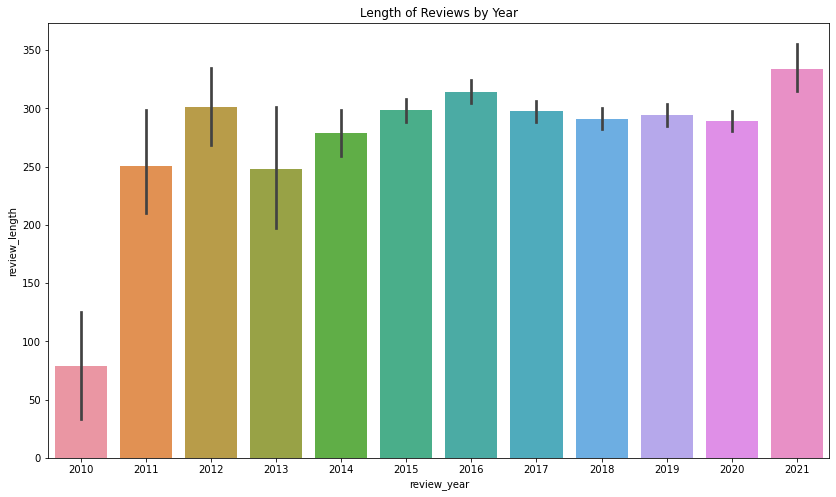

In [73]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x="review_year", y="review_length", data=dfsent)
ax.set_title('Length of Reviews by Year')

Text(0.5, 1.0, 'Number of helpful voted reviews by Year')

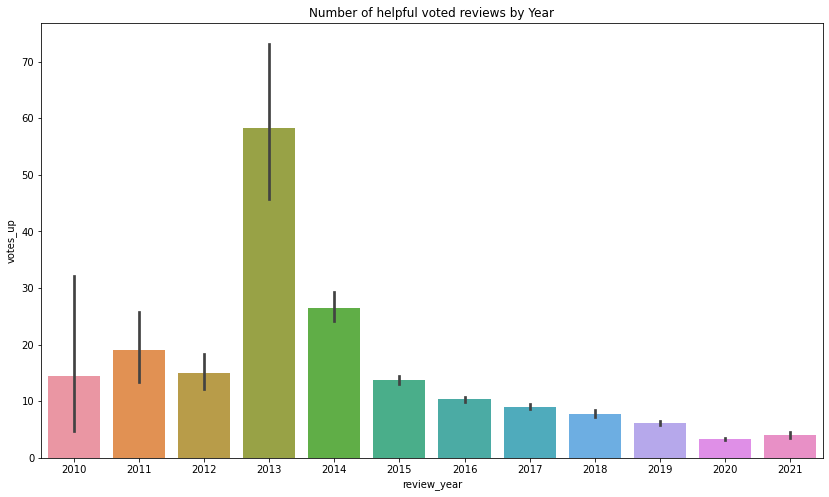

In [74]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x="review_year", y="votes_up", data=dfsent)
ax.set_title('Number of helpful votes on reviews by Year')

Text(0.5, 1.0, 'Number of positive reviews by Year')

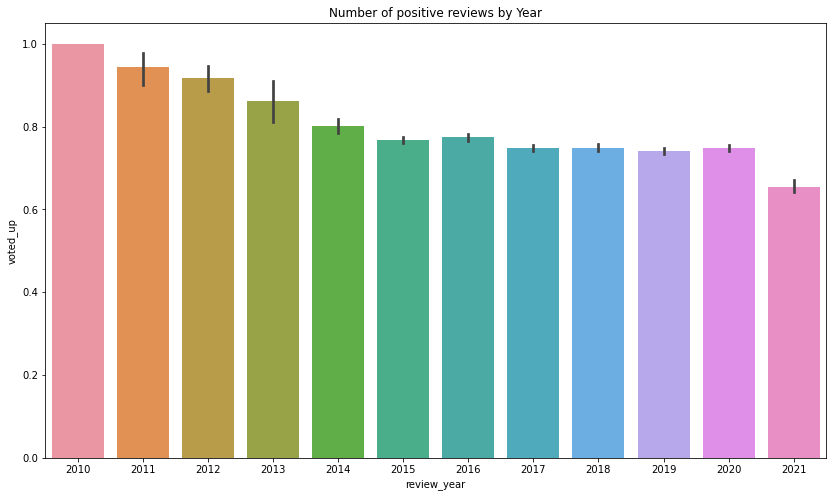

In [75]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x="review_year", y="voted_up", data=dfsent)
ax.set_title('Number of positive reviews by Year')

Text(0.5, 1.0, 'Number of reviews by Year')

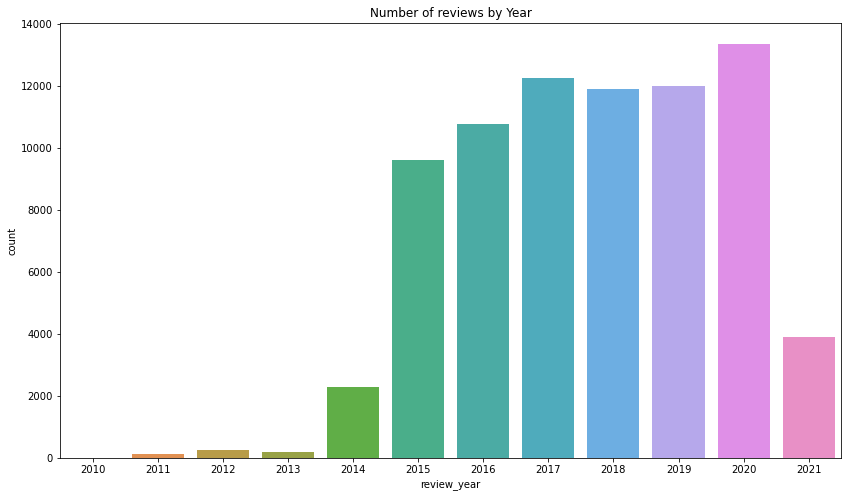

In [77]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.countplot(x='review_year', data=dfsent)
ax.set_title('Number of reviews by Year')

KeyboardInterrupt: 

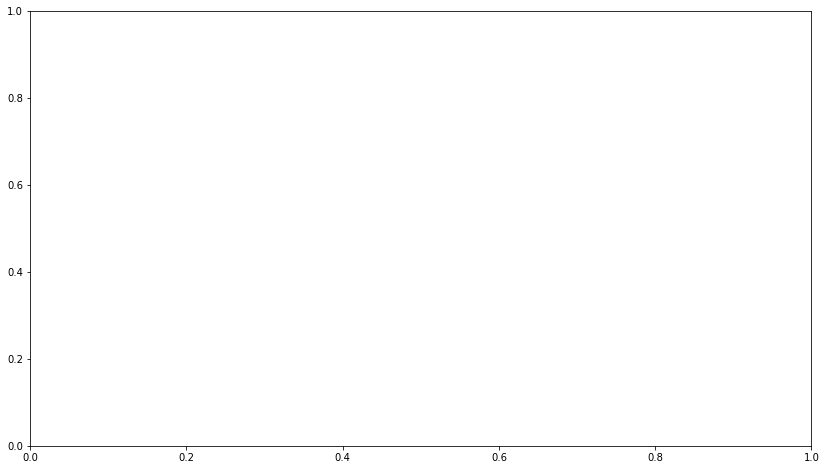

In [70]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x="review_year", y="recommendationid", data=dfsent)

In [14]:
def conf_matrix(x):
    if x['voted_up'] == 1 and x['review_com'] == 1:
        return 'TP'
    elif x['voted_up'] == 1 and x['review_com'] == -1:
        return 'FN'
    elif x['voted_up'] == 1 and x['review_com'] == 1:
        return 'FP'
    elif x['voted_up'] == 1 and x['review_com'] == -1:
        return 'TN'
    else:
        return 0
    


In [15]:
dfsent['Conf_Matrix'] = dfsent.apply(lambda x: conf_matrix(x), axis=1)

In [16]:
conf_vals = dfsent.Conf_Matrix.value_counts().to_dict()
print(conf_vals)

accuracy = (conf_vals['TP'] + conf_vals['TN']) / (conf_vals['TP'] + conf_vals['TN'] + conf_vals['FP'] + conf_vals['FN'])
precision = conf_vals['TP'] / (conf_vals['TP'] + conf_vals['FP'])
recall = conf_vals['TP'] / (conf_vals['TP'] + conf_vals['FN'])
f1_score = 2*precision*recall / (precision + recall)
print('Accuracy: ', round(100 * accuracy, 2),'%',
      '\nPrecision: ', round(100 * precision, 2),'%',
      '\nRecall: ', round(100 * recall, 2),'%',
      '\nF1 Score: ', round(100 * f1_score, 2),'%')

{0: 76640}


KeyError: 'TP'

In [17]:
dfsent.Conf_Matrix.value_counts()

0    76640
Name: Conf_Matrix, dtype: int64